# **Predicting House Prices using ANN**

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense 

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

### Loading the dataset

In [2]:
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


### Explore the Dataset 

In [5]:
print('DATA INFO -->>')
print(data.info())
print('\nDATA STATS DESCRIPTION -->>')
print(data.describe())
print('\nDATA NULL VALUES -->>')
print(data.isnull().sum())

DATA INFO -->>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

DATA STATS DESCRIPTION -->>
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      

### Visualize

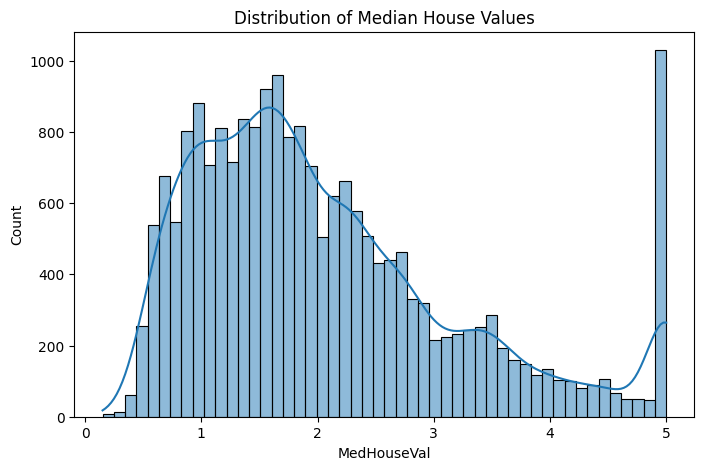

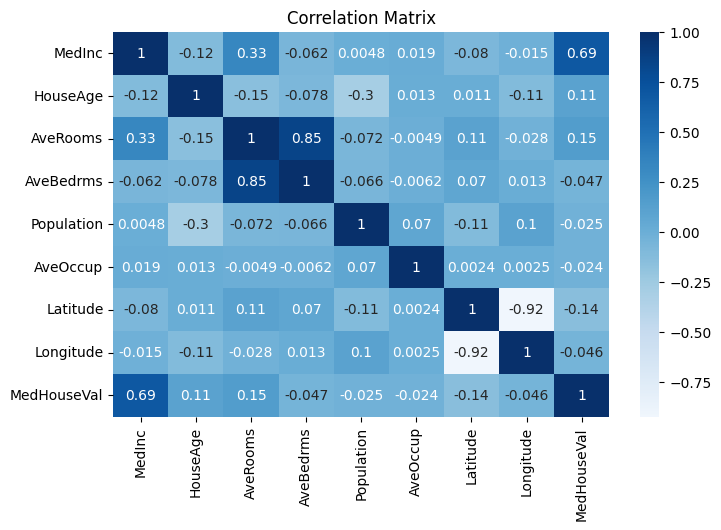

In [10]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Values')
plt.show()

# Examine correlations between features and the target
plt.figure(figsize=(8, 5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix')
plt.show()

### Preprocess the Data


Separate Features

In [12]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [16]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Spliting the data in train and test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Feature Scaling

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Printing to see the effect of scaling

In [22]:
print("Training data mean (first feature):", X_train_scaled[:, 0].mean())
print("Training data std (first feature):", X_train_scaled[:, 0].std())

Training data mean (first feature): -6.51933287715935e-17
Training data std (first feature): 0.9999999999999998


### **Building the Neural Network Model**

In [40]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    n_features = X_train_scaled.shape[1]

    for i in range (num_layers):
        if i == 0:
            model.add(
                Dense(
                    hp.Int('node_'+str(i), min_value=8, max_value=128, step=8),
                    activation = hp.Choice('activation_'+str(i), values=['relu', 'tanh', 'sigmoid', 'elu']),
                    input_dim =  n_features
                )
            )

        else:
            model.add(
                Dense(
                    hp.Int('node_'+str(i), min_value=8, max_value=128, step=8),
                    activation = hp.Choice('activation_'+str(i), values=['relu', 'tanh', 'sigmoid', 'elu'])
                )
            )
    model.add(Dense(1, activation='sigmoid'))

    optimizer = hp.Choice('optimizer', values=['adam', 'nadam', 'rmsprop', 'sgd', 'momentum'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model



In [41]:
tuner = kt.RandomSearch(build_model, 
                        objective='val_mae',
                        max_trials=5,
                        directory='KerasTunerCache',
                        project_name='HousePrediction')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
tuner.search(X_train_scaled, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 01s]

Best val_mae So Far: 1.140777826309204
Total elapsed time: 00h 00m 16s


In [43]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'node_0': 32,
 'activation_0': 'elu',
 'optimizer': 'adam',
 'node_1': 16,
 'activation_1': 'elu',
 'node_2': 104,
 'activation_2': 'tanh',
 'node_3': 48,
 'activation_3': 'relu',
 'node_4': 56,
 'activation_4': 'relu'}

In [44]:
model = tuner.get_best_models(num_models=1)[0]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [45]:
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, initial_epoch=5, validation_split=0.1, verbose=1)

Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4776 - mae: 1.1481 - val_loss: 2.5353 - val_mae: 1.1578
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4772 - mae: 1.1473 - val_loss: 2.5338 - val_mae: 1.1551
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4769 - mae: 1.1467 - val_loss: 2.5329 - val_mae: 1.1527
Epoch 9/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4762 - mae: 1.1457 - val_loss: 2.5333 - val_mae: 1.1516
Epoch 10/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4760 - mae: 1.1448 - val_loss: 2.5324 - val_mae: 1.1514
Epoch 11/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4757 - mae: 1.1444 - val_loss: 2.5325 - val_mae: 1.1518
Epoch 12/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4754 - mae: 1.1434 - val_loss: 2.5338 - val_mae: 1.1554
Epoch 13/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4752 - mae: 1.1433 - val_loss: 2.5324 - val_mae: 1.1517
Epoch 14/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s

Plot the Training History

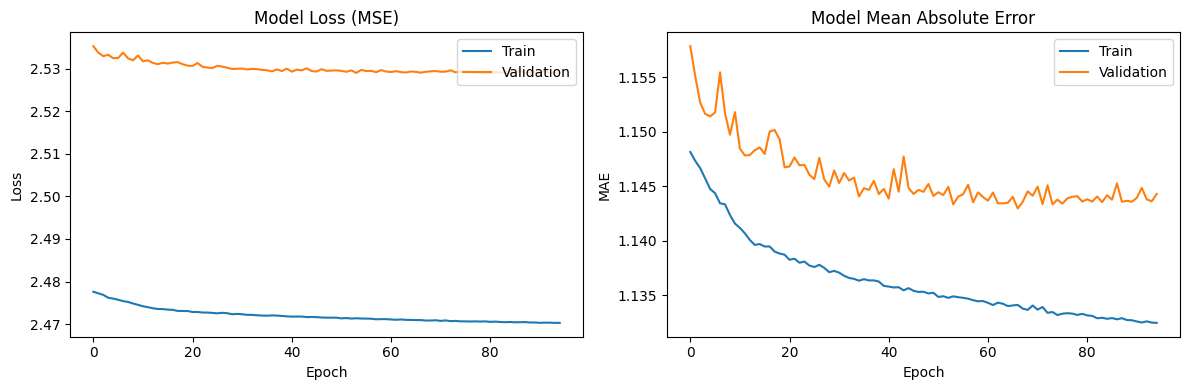

In [47]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### **Evaluation and Analysis**

Evaluate on Test Data

In [50]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nFinal Test Loss (MSE): {test_loss:.4f}')
print(f'Final Test Mean Absolute Error (MAE): {test_mae:.4f}')

print(f"On average, your prediction is off by Rs.{test_mae * 100_000:.2f} INR.")


Final Test Loss (MSE): 2.4149
Final Test Mean Absolute Error (MAE): 1.1220
On average, your prediction is off by Rs.112204.84 INR.


Make Predictions and Analyze Results

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


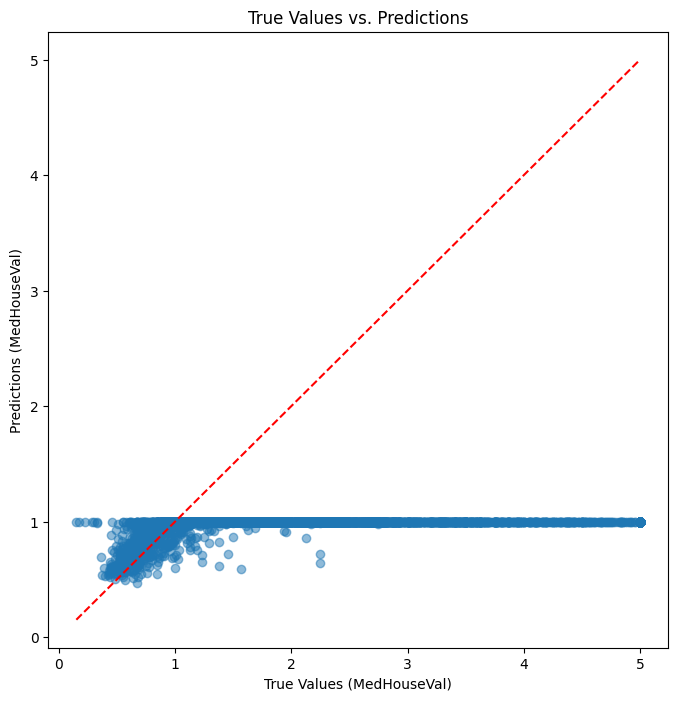


Test RMSE: 1.5540
Test R²: -0.8429


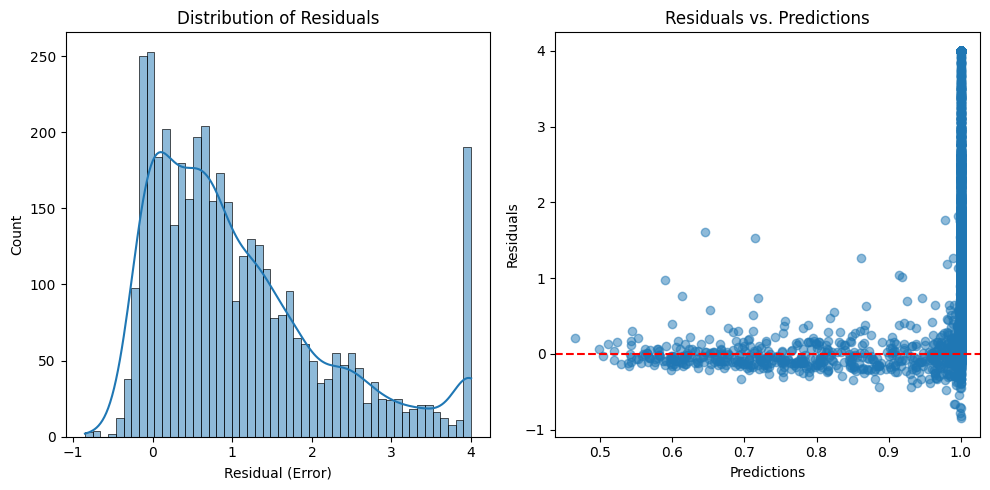

In [51]:
# Generate predictions for the test set
y_pred = model.predict(X_test_scaled)

# Create a scatter plot of True values vs Predictions
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values (MedHouseVal)')
plt.ylabel('Predictions (MedHouseVal)')
plt.title('True Values vs. Predictions')

# Plot a perfect prediction line (y=x) for reference
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

# Calculate additional metrics for a fuller picture
from sklearn.metrics import mean_squared_error, r2_score

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse) # Root Mean Squared Error
test_r2 = r2_score(y_test, y_pred) # R-squared score

print(f"\nTest RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Analyze the residuals (errors)
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Error)')

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()